In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 500

In [ ]:
x_min, x_max = -1, 1
X = np.random.uniform(low=x_min, high=x_max, size=n)

In [ ]:
r = np.maximum(0, X)
sigma = 0.2 #Sigam elegido de manera aleatoria
Y = np.random.normal(r, sigma, n)#Noise

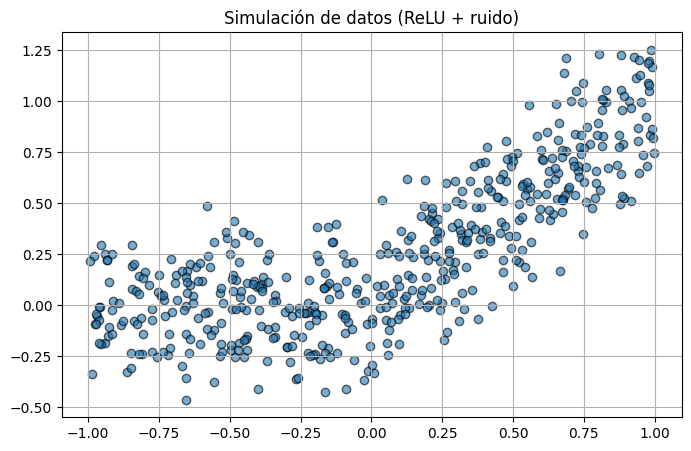

In [ ]:
#Grafico Raw data
plt.figure(figsize=(8,5))
plt.scatter(X, Y, alpha=0.6, edgecolor='k')
plt.title("Simulación de datos (ReLU + ruido)")
plt.grid(True)
plt.show()

In [ ]:
class RegLineal:
  #Opcional, para inicializar atributos o declarar hiperpar´ametros
  def __init__(self):
    self.params = None

  #Etapa de entrenamiento
  def fit(self,X,y):
    X = np.column_stack((X, np.ones((X.shape[0], 1))))
    self.params = np.linalg.inv(X.T @ X) @ X.T @ y #w contains w and b

  #Etapa de testeo
  def predict(self,X):
    return np.column_stack((X, np.ones((X.shape[0], 1)))) @ self.params

  #Computo del error
  def err_predict(self,X,y):
    return np.mean((np.column_stack((X, np.ones((X.shape[0], 1)))) @ self.params
 - y.T) ** 2)

  #Metodo gradiente descendiente
  def fit_gradient(self, X, y, learning_rate=0.01, n_iter=1000):
        m = X.shape[0]
        X_b = np.column_stack((X, np.ones((m, 1))))
        self.params = np.zeros(X_b.shape[1])
        aux = []

        for _ in range(n_iter):
            grad = (1/m) * (X_b.T @ (X_b @ self.params - y))
            self.params -= learning_rate * grad
            aux.append(self.params.copy())
        return aux

In [ ]:
#Enrenamiento usando los valores del inciso (a)
regresor = RegLineal()
regresor.fit(X, Y)
print(f'Parametros del ajuste lineal: w = {regresor.params[0]}, b = {regresor.params[1]}')

Parametros del ajuste lineal: w = 0.5122286180828521, b = 0.23822546891723664


In [ ]:
#Calculo el predictor
pred = regresor.predict(X)

In [ ]:
#Error de entrenamiento
err_fit = regresor.err_predict(X, Y)
print(f'Error de prediccion: {err_fit}')

Error de prediccion: 0.05922596122589202


In [ ]:
#Potencia producida para una irradancia de 0.5
irradancia = 0.5
x_pot = np.array([1, irradancia])
pot = x_pot @ regresor.params
print(f'Potencia para irradancia de 0.5: {pot}')

Potencia para irradancia de 0.5: 0.6313413525414705


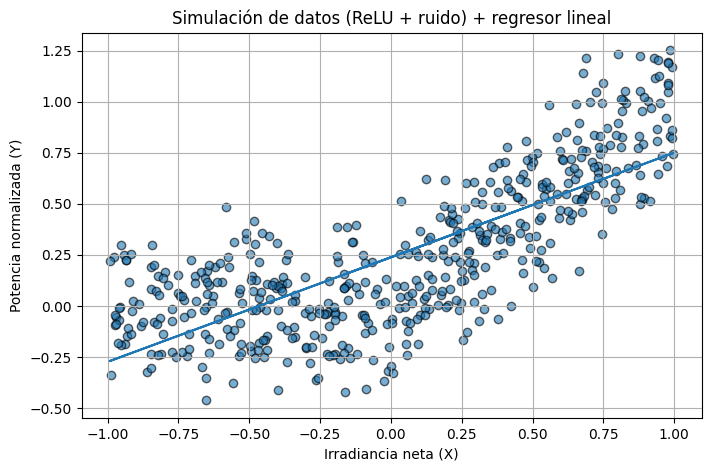

In [ ]:
#Grafico el predictor
plt.figure(figsize=(8,5))
plt.plot(X, pred)
plt.scatter(X, Y, alpha=0.6, edgecolor='k')
plt.xlabel("Irradiancia neta (X)")
plt.ylabel("Potencia normalizada (Y)")
plt.title("Simulación de datos (ReLU + ruido) + regresor lineal")
plt.grid(True)
plt.show()

$ \textbf{Analisis Teorico}$

Sea $X \sim \mathcal{U}(-1,1)$ y $Y|X=x \sim \mathcal{N}(r(x), \sigma^2)$, con $\sigma^2 = 0.04$ y

$r(x) = x \cdot \mathbf{1}_{\{x>0\}} \quad \text{(función ReLU).}$

Definimos $Y = r(X) + \varepsilon$, con $\varepsilon \sim \mathcal{N}(0,\sigma^2)$ independiente de $X$.

$ \textbf{Cálculo de momentos}$

$\mathbb{E}[X] = 0,$
$\quad \mathrm{Var}(X) = \frac{(1-(-1))^2}{12} = \frac{1}{3}.$

$\mathbb{E}[Y] = \mathbb{E}[r(X)] = \int_0^1 \frac{x}{2}\,dx = \frac{1}{4}.$

$\mathbb{E}[r(X)^2] = \int_0^1 \frac{x^2}{2}\,dx = \frac{1}{6}.$


$\mathrm{Var}(Y) = \mathrm{Var}(r(X)) + \sigma^2
= \left(\frac{1}{6} - \frac{1}{16}\right) + 0.04
= \frac{173}{1200} \approx 0.1442.$

$\mathbb{E}[XY] = \mathbb{E}[X \cdot r(X)] = \int_0^1 \frac{x^2}{2}\,dx = \frac{1}{6}.$

$\textbf{Regresor óptimo y error bayesiano}$

La función de regresión óptima (minimizadora del MSE) es
$f^*(x) = \mathbb{E}[Y|X=x] = r(x) = x \cdot \mathbf{1}_{\{x>0\}}.$

El error bayesiano es
$\mathbb{E}[\mathrm{Var}(Y|X)] = \sigma^2 = 0.04.$

$\textbf{Mejor predictor sin observar $X$}$

Si no se observa $X$, el mejor predictor constante es
$c^* = \mathbb{E}[Y] = \tfrac{1}{4}.$

Su error esperado es
$\mathbb{E}[(Y-c^*)^2] = \mathrm{Var}(Y) = \frac{173}{1200} \approx 0.1442.$
Este error es mayor que el óptimo (0.04), con una diferencia de aproximadamente $0.104$.


In [ ]:
#Enrenamiento usando los valores del inciso (d)
pred_grad = regresor.fit_gradient(X, Y, 0.01, 500)
print(f'Parametros del ajuste lineal: w = {regresor.params[0]}, b = {regresor.params[1]}')

Parametros del ajuste lineal: w = 0.41139882487667967, b = 0.2419185911157549


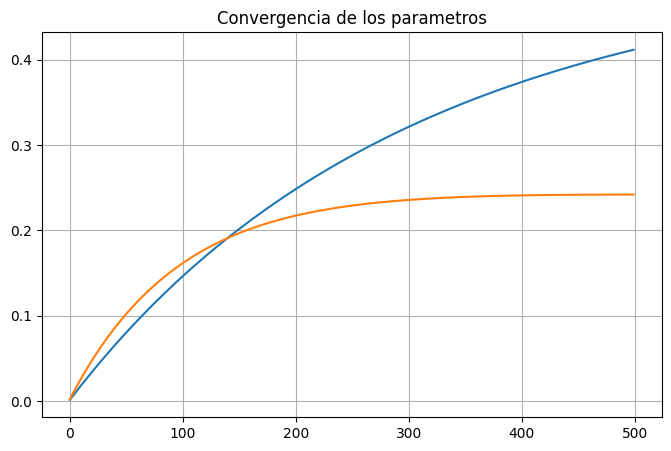

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(pred_grad)
plt.title("Convergencia de los parametros")
plt.grid(True)
plt.show()

In [ ]:
#Error de entrenamiento
err_fit = regresor.err_predict(X, Y)
print(f'Error de prediccion: {err_fit}')

Error de prediccion: 0.06247650792946421


In [ ]:
pred_grad = regresor.predict(X)

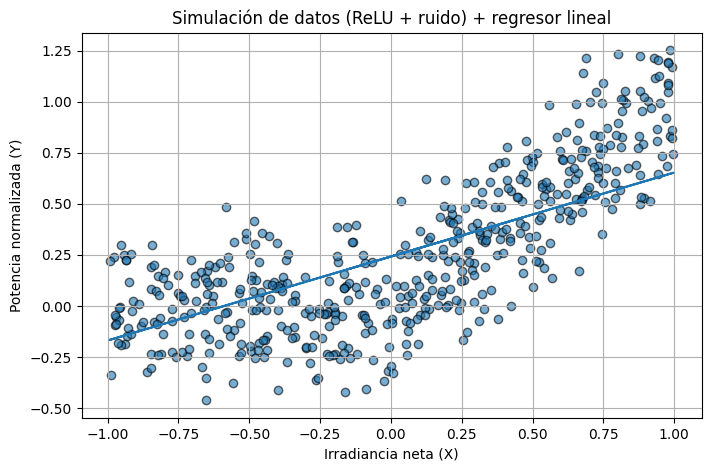

In [ ]:
#Grafico el predictor
plt.figure(figsize=(8,5))
plt.plot(X, pred_grad)
plt.scatter(X, Y, alpha=0.6, edgecolor='k')
plt.xlabel("Irradiancia neta (X)")
plt.ylabel("Potencia normalizada (Y)")
plt.title("Simulación de datos (ReLU + ruido) + regresor lineal")
plt.grid(True)
plt.show()